## *ETL user.parquet*

### Este código realiza una serie de pasos para limpiar y transformar un DataFrame de usuarios de Yelp. Los pasos incluyen la eliminación de duplicados, la asignación de un nuevo índice, la conversión de tipos de datos, la separación de datos en filas y la eliminación de columnas innecesarias. Todo esto se realiza para preparar los datos para un análisis más profundo y asegurar que sean consistentes y útiles.

In [1]:
# Montamos Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importarmos la librerias necesarias
import pandas as pd
import numpy as np

In [3]:
#Leemos el archivo tipo Parquet con Pandas
parquet_file = '/content/drive/My Drive/user.parquet'
df_user = pd.read_parquet(parquet_file)

Inspección inicial del DataFrame

In [4]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


Información del DataFrame

In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


## LIMPIEZA DE DATOS

In [6]:
# Convertir columnas a tipo de dato adecuado
df_user['user_id'] = df_user['user_id'].astype(str)
df_user['name'] = df_user['name'].astype(str)
df_user['review_count'] = df_user['review_count'].astype(int)
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['useful'] = df_user['useful'].astype(int)
df_user['funny'] = df_user['funny'].astype(int)
df_user['cool'] = df_user['cool'].astype(int)
df_user['elite'] = df_user['elite'].astype(str)
df_user['friends'] = df_user['friends'].astype(str)
df_user['fans'] = df_user['fans'].astype(int)
df_user['average_stars'] = df_user['average_stars'].astype(float)

compliment_columns = [
    'compliment_more', 'compliment_hot', 'compliment_profile', 'compliment_cute',
    'compliment_list', 'compliment_note', 'compliment_plain',
    'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'
]

# Convertir todas las columnas 'compliment_' a enteros
for col in compliment_columns:
    df_user[col] = df_user[col].astype(int)

# Verificar las conversiones
print(df_user.dtypes)

user_id                       object
name                          object
review_count                   int64
yelping_since         datetime64[ns]
useful                         int64
funny                          int64
cool                           int64
elite                         object
friends                       object
fans                           int64
average_stars                float64
compliment_hot                 int64
compliment_more                int64
compliment_profile             int64
compliment_cute                int64
compliment_list                int64
compliment_note                int64
compliment_plain               int64
compliment_cool                int64
compliment_funny               int64
compliment_writer              int64
compliment_photos              int64
dtype: object


In [7]:
# Ver la cantidad de valores nulos por cada columna
valores_nulos = df_user.isnull().sum()

# Mostrar el resultado
print(valores_nulos)


user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [8]:
num_duplicados = df_user['user_id'].duplicated().sum()
print(f"Total de duplicados en user_id: {num_duplicados}")


Total de duplicados en user_id: 117700


In [9]:
filas = df_user.shape[0]
columnas = df_user.shape[1]

print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

El DataFrame tiene 2105597 filas y 22 columnas.


Eliminar duplicados

In [10]:
#Eliminamos filas duplicadas en el DataFrame basándose en las columnas user_id y name.
df = df_user.drop_duplicates(subset=["user_id", "name"], keep="first")

#Nos aseguramos de que cada usuario esté representado una sola vez en el DataFrame, lo que es crucial para un análisis preciso.

Reasignar el índice

In [11]:
#Reiniciamos el índice del DataFrame df después de eliminar duplicados
df = df.reset_index(drop=True)

Añadir un nuevo índice como columna

In [12]:
#Crea una nueva columna id_user que contiene el índice actual del DataFrame.
df['id_user'] = df.index

# Ahora df tiene el índice reasignado y se puede usar sin problemas.
df_user = df


In [13]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,55,56,18,232,844,467,467,239,180,0
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,1
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,10,17,3,66,96,119,119,35,18,2
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,1,6,2,12,16,26,26,10,9,3
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,1,1,0,0,0,0,4


### Organizar los datos de fecha y hora

In [14]:
# Crear nuevas columnas para la fecha y la hora
df_user['yelping_since_fecha'] = df_user['yelping_since'].dt.date
df_user['yelping_since_hora'] = df_user['yelping_since'].dt.time

In [15]:
# Eliminar la columna original 'timestamp'
df_user = df_user.drop('yelping_since', axis=1)

In [16]:
import re

In [17]:
# Asegurarse de que todos los valores sean cadenas, rellenando los valores NaN si es necesario
df_user['yelping_since_fecha'] = df_user['yelping_since_fecha'].astype(str)

# Función para verificar si una fecha sigue el formato 'YYYY-MM-DD'
def verificar_formato_fecha(fecha):
    # Verificar que no sea 'None' convertido a cadena
    if fecha == 'None':
        return False
    # Expresión regular para el formato 'YYYY-MM-DD'
    return bool(re.match(r'^\d{4}-\d{2}-\d{2}$', fecha))

# Aplicar la función de verificación a la columna 'yelping_since_fecha'
df_user['fecha_correcta'] = df_user['yelping_since_fecha'].apply(verificar_formato_fecha)

# Comprobar si todas las fechas están en el formato correcto
if df_user['fecha_correcta'].all():
    print("Todas las fechas están en el formato 'YYYY-MM-DD'.")
else:
    print("Hay fechas que no están en el formato correcto.")

Todas las fechas están en el formato 'YYYY-MM-DD'.


In [18]:
# Eliminar la columna original 'fecha_correcta'
df_user = df_user.drop('fecha_correcta', axis=1)

### Ya hemos separado la fecha y la hora y nos aseguramos que todas las fechas se encuentren en el mismo formato YYYY-MM-DD.

### Ahora haremos lo mismo con la hora

In [19]:
# Función para verificar si la hora sigue el formato 'HH:MM:SS'
def verificar_formato_hora(hora):
    # Expresión regular para el formato 'HH:MM:SS'
    return bool(re.match(r'^([01]\d|2[0-3]):([0-5]\d):([0-5]\d)$', hora))

# Asegurarse de que todos los valores sean cadenas
df_user['yelping_since_hora'] = df_user['yelping_since_hora'].astype(str)

# Aplicar la función de verificación a la columna 'hora'
df_user['hora_correcta'] = df_user['yelping_since_hora'].apply(verificar_formato_hora)


# Comprobar si todas las horas están en el formato correcto
if df_user['hora_correcta'].all():
    print("Todas las horas están en el formato 'HH:MM:SS'.")
else:
    print("Hay horas que no están en el formato correcto.")

Todas las horas están en el formato 'HH:MM:SS'.


In [20]:
# Eliminar la columna original 'fecha_correcta'
df_user = df_user.drop('hora_correcta', axis=1)

### La columana Yelping_since_hora se encuentren en el mismo formato HH:MM:SS

In [21]:
# Mostrar el DataFrame resultante
df_user.head()

,user_id,name,review_count,useful,funny,cool,elite,friends,fans,average_stars,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user,yelping_since_fecha,yelping_since_hora
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,...,18,232,844,467,467,239,180,0,2007-01-25,16:47:26
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,...,251,1847,7054,3131,3131,1521,1946,1,2009-01-25,04:35:42
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,...,3,66,96,119,119,35,18,2,2008-07-25,10:41:00
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,...,2,12,16,26,26,10,9,3,2005-11-29,04:38:33
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,...,0,1,1,0,0,0,0,4,2007-01-05,19:40:59


### Ahora Analizaremos las columnas compliment_

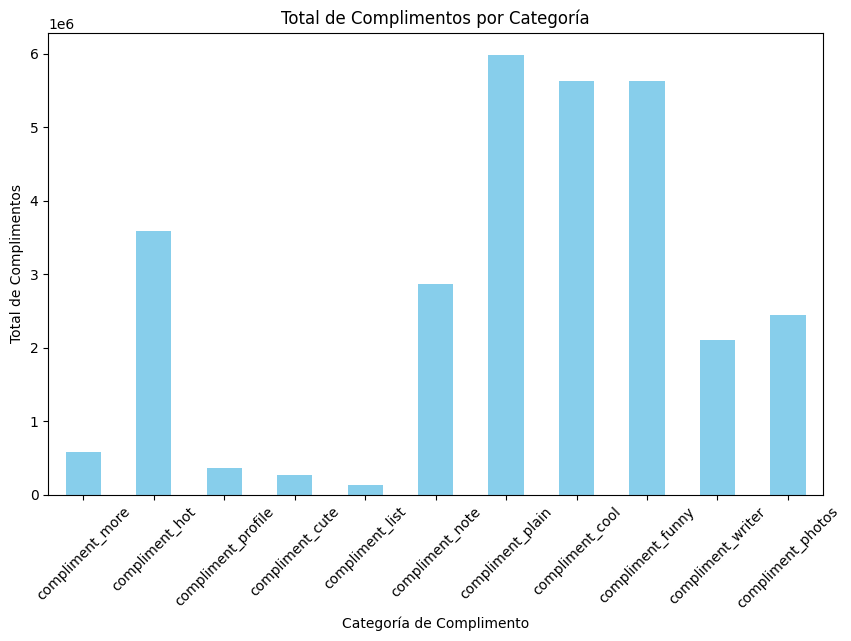

In [22]:
import matplotlib.pyplot as plt

# Sumar el total de cumplidos por cada categoría
compliment_totals = df_user[compliment_columns].sum()

# Graficar la distribución de cumplidos
plt.figure(figsize=(10, 6))
compliment_totals.plot(kind='bar', color='skyblue')
plt.title('Total de Complimentos por Categoría')
plt.ylabel('Total de Complimentos')
plt.xlabel('Categoría de Complimento')
plt.xticks(rotation=45)
plt.show()

### Analisis estadistico

In [23]:
# Filtrar columnas que comienzan con "compliment_"
compliment_columns = [col for col in df_user.columns if col.startswith('compliment_')]

# Calcular estadísticas básicas
compliment_stats = df_user[compliment_columns].describe().T
compliment_stats['zeros'] = (df_user[compliment_columns] == 0).sum()
print(compliment_stats)


                        count      mean         std  min  25%  50%  75%  \
compliment_hot      1987897.0  1.807072   73.601841  0.0  0.0  0.0  0.0   
compliment_more     1987897.0  0.292263   12.824667  0.0  0.0  0.0  0.0   
compliment_profile  1987897.0  0.179318   15.155253  0.0  0.0  0.0  0.0   
compliment_cute     1987897.0  0.133649   11.356823  0.0  0.0  0.0  0.0   
compliment_list     1987897.0  0.063907   10.043627  0.0  0.0  0.0  0.0   
compliment_note     1987897.0  1.443135   60.167900  0.0  0.0  0.0  0.0   
compliment_plain    1987897.0  3.011841  119.389804  0.0  0.0  0.0  0.0   
compliment_cool     1987897.0  2.829308   96.663854  0.0  0.0  0.0  0.0   
compliment_funny    1987897.0  2.829308   96.663854  0.0  0.0  0.0  0.0   
compliment_writer   1987897.0  1.056448   32.179728  0.0  0.0  0.0  0.0   
compliment_photos   1987897.0  1.226859   95.157513  0.0  0.0  0.0  0.0   

                         max    zeros  
compliment_hot       25784.0  1833682  
compliment_more    


### Mean (Promedio): Los valores promedio son bastante bajos, lo que sugiere que muchos usuarios no reciben estos "compliments" con frecuencia. Por ejemplo, "compliment_more" tiene un promedio de 0.292263.
### Zeros: La mayoría de los valores en cada columna son ceros. Por ejemplo, la columna "compliment_hot" tiene 1,833,682 ceros.

In [24]:
non_numeric_cols = df_user.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['user_id', 'name', 'elite', 'friends', 'yelping_since_fecha',
       'yelping_since_hora'],
      dtype='object')


### Matriz de correlacion

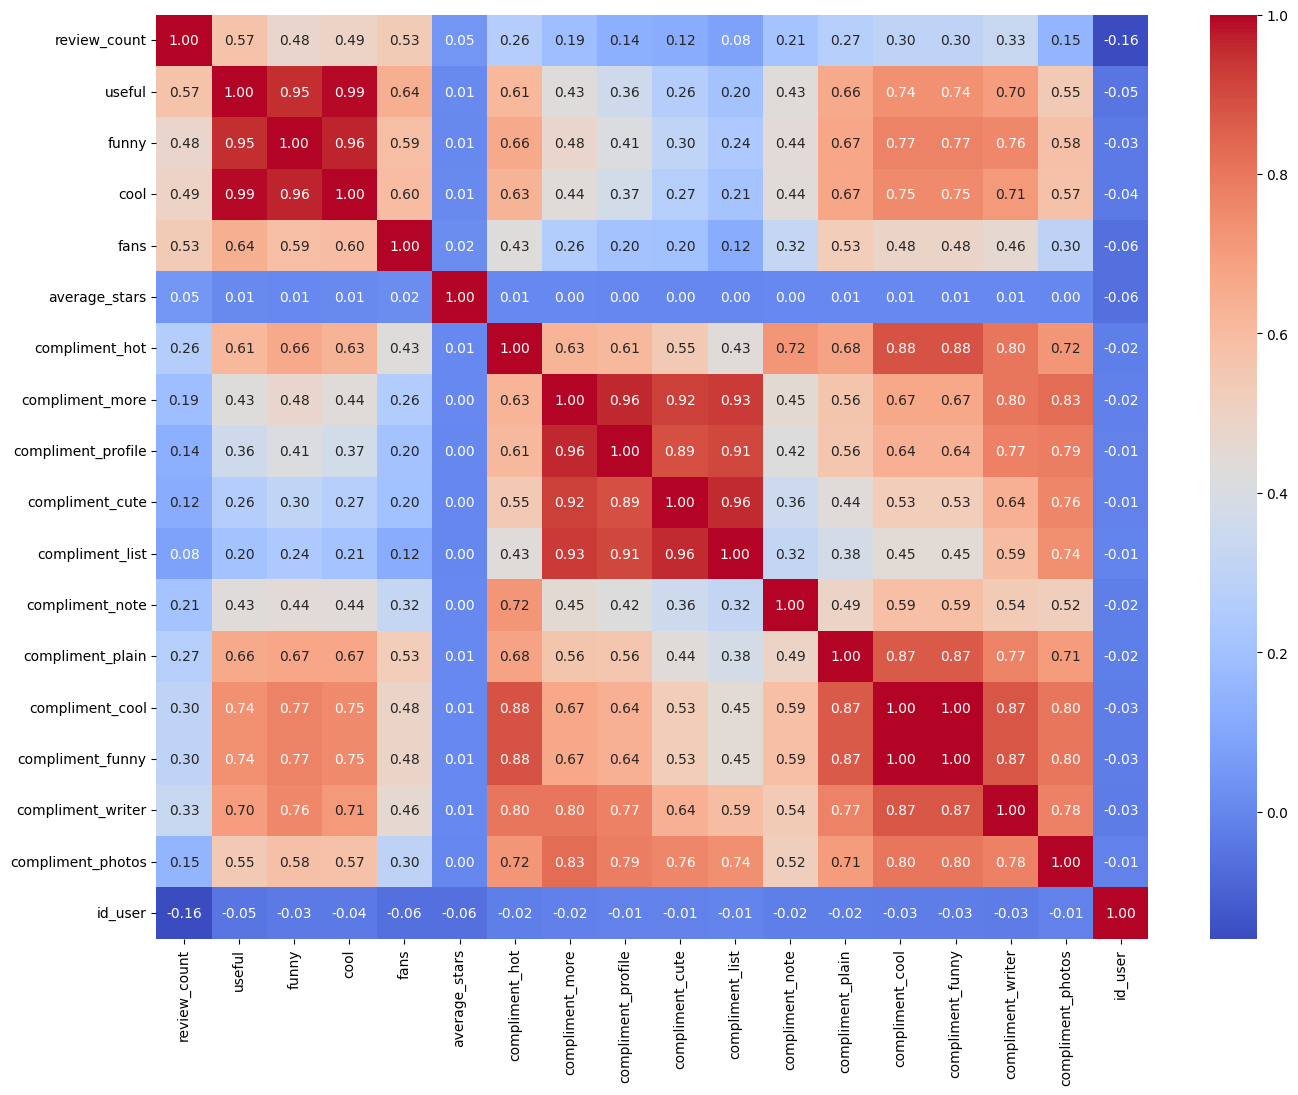

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Definir las columnas a eliminar
non_numeric_cols = ['user_id', 'name', 'elite', 'friends', 'yelping_since_fecha',
       'yelping_since_hora']

# Crear un DataFrame sin las columnas no numéricas
df_numeric = df_user.drop(columns=non_numeric_cols)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()




### Basandonos en los resultados obtenidos, aquí hay algunos análisis y conclusiones que puedes sacar de tus datos y la gráfica de correlación:

### - Alta cantidad de ceros: La mayoría de las columnas "compliment_" tienen muchos valores de cero, lo que indica que no todos los usuarios reciben estos tipos de cumplidos. Esto puede significar que los cumplidos no son comunes o no se usan con frecuencia.

### - Distribución desigual: Los valores promedios (mean) son muy bajos en comparación con los valores máximos (max), lo que sugiere que unos pocos usuarios reciben muchos cumplidos, mientras que la mayoría no recibe ninguno.

### - Baja correlación: Si las columnas "compliment_" muestran baja correlación con variables claves como por ejemplo: reviw, average_stars, es probable que no aporten mucha información útil. Esto justifica su eliminación para simplificar tu modelo y mejorar su rendimiento.

### - Imbalance en los datos: La alta desviación estándar (std) en comparación con los valores promedio (mean) indica que hay una gran variabilidad en los datos. Esto puede afectar el rendimiento del modelo si no se maneja adecuadamente.

### Eliminar estas columnas parece una buena decisión ya que esta informacion  no contribuyen significativamente.

In [26]:
# Lista de columnas a eliminar
columns_to_drop = [
    'compliment_more', 'compliment_hot', 'compliment_profile', 'compliment_cute',
    'compliment_list', 'compliment_note', 'compliment_plain',
    'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'
]

# Elimina las columnas del DataFrame
df_user_cleaned = df_user.drop(columns=columns_to_drop)

print(df_user_cleaned.shape)  # Verifica el tamaño del DataFrame
print(df_user_cleaned.head())  # Muestra las primeras filas del DataFrame limpio


(1987897, 13)
                  user_id    name  review_count  useful  funny   cool  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585    7217   1259   5994   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333   43091  13066  27281   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665    2086   1010   1003   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224     512    330    299   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79      29     15      7   

                                               elite  \
0                                               2007   
1  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2                           2009,2010,2011,2012,2013   
3                                     2009,2010,2011   
4                                                      

                                             friends  fans  average_stars  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267           3.91   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  31

In [27]:
#Selecciona las columnas id_user y user_id y renombra user_id a yelp_id.
dfusuario = df_user.loc[:, ["id_user",'user_id']]
dfusuario.to_csv("UsuarioYelp")
# realizamos esta accion con el fin de Para preparar un DataFrame específico que solo contenga los identificadores de los usuarios y Facilitar la comprensión de los nombres de las columnas


In [28]:
dfusuario.head()

,id_user,user_id
0,0,qVc8ODYU5SZjKXVBgXdI7w
1,1,j14WgRoU_-2ZE1aw1dXrJg
2,2,2WnXYQFK0hXEoTxPtV2zvg
3,3,SZDeASXq7o05mMNLshsdIA
4,4,hA5lMy-EnncsH4JoR-hFGQ


In [29]:
df_user_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              object 
 1   name                 object 
 2   review_count         int64  
 3   useful               int64  
 4   funny                int64  
 5   cool                 int64  
 6   elite                object 
 7   friends              object 
 8   fans                 int64  
 9   average_stars        float64
 10  id_user              int64  
 11  yelping_since_fecha  object 
 12  yelping_since_hora   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 197.2+ MB


In [31]:
# Cambia el tipo de dato de las columnas especificadas en string a 'object'
df_user_cleaned['user_id'] = df_user_cleaned['user_id'].astype('object')
df_user_cleaned['name'] = df_user_cleaned['name'].astype('object')
df_user_cleaned['yelping_since_fecha'] =df_user_cleaned['yelping_since_fecha'].astype('object')
df_user_cleaned['yelping_since_hora'] = df_user_cleaned['yelping_since_hora'].astype('object')

# Verificamos los cambios
print(df_user_cleaned.dtypes)


user_id                 object
name                    object
review_count             int64
useful                   int64
funny                    int64
cool                     int64
elite                   object
friends                 object
fans                     int64
average_stars          float64
id_user                  int64
yelping_since_fecha     object
yelping_since_hora      object
dtype: object


In [ ]:
# Exportar el archivo comprimido para ahorrar espacio
dfusuario.to_csv("/content/drive/My Drive/UsuarioYelp.csv.gz", compression='gzip', index=False)
df_user_cleaned.to_csv('/content/drive/My Drive/user_cleaned.csv.gz', compression='gzip', index=False)

## Archivo TIP.json


### Leemos el archivo

In [32]:
import json

In [ ]:
# Ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/tip.json'

In [ ]:

import pandas as pd

# Leer el archivo JSON línea por línea y almacenar los objetos JSON en una lista
json_objects = []

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        json_objects.append(json.loads(line))

# Convertir la lista de objetos JSON en un DataFrame
df_tip = pd.DataFrame(json_objects)



In [ ]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
df_tip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


### Corregir el tipo de dato

In [ ]:
# Convertir 'user_id' y 'business_id' a cadenas de texto (string)
df_tip['user_id'] = df_tip['user_id'].astype(str)
df_tip['business_id'] = df_tip['business_id'].astype(str)

# Convertir 'text' a string, aunque ya está correcto
df_tip['text'] = df_tip['text'].astype(str)

# Convertir 'date' a formato de fecha
df_tip['date'] = pd.to_datetime(df_tip['date'])

# 'compliment_count' ya está en el tipo correcto (int64), no requiere cambios

# Verificar las conversiones
print(df_tip.dtypes)


user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object


In [ ]:
filas = df_tip.shape[0]
columnas = df_tip.shape[1]

print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

El DataFrame tiene 908915 filas y 5 columnas.


### Verificamos si tenemos duplicados

In [ ]:
num_duplicados = df_tip['user_id'].duplicated().sum()
print(f"Total de duplicados en user_id: {num_duplicados}")

Total de duplicados en user_id: 607157


In [ ]:
num_duplicados = df_tip['business_id'].duplicated().sum()
print(f"Total de duplicados en business_id: {num_duplicados}")

Total de duplicados en business_id: 802722


### Eliminamos duplicados

In [ ]:
# Eliminar duplicados basados en la columna 'user_id'
df_tip_cleaned = df_tip.drop_duplicates(subset='user_id', keep='first')

# Verificar el nuevo tamaño del DataFrame y asegurar que los duplicados se eliminaron
print(df_tip_cleaned.shape)
print(f"Total de duplicados en user_id después de eliminar: {df_tip_cleaned['user_id'].duplicated().sum()}")


(301758, 5)
Total de duplicados en user_id después de eliminar: 0


In [ ]:
# Eliminar duplicados basados en la columna 'business_id'
df_tip_cleaned = df_tip.drop_duplicates(subset='business_id', keep='first')

# Verificar el nuevo tamaño del DataFrame y asegurar que los duplicados se eliminaron
print(df_tip_cleaned.shape)
print(f"Total de duplicados en business_id después de eliminar: {df_tip_cleaned['business_id'].duplicated().sum()}")

(106193, 5)
Total de duplicados en business_id después de eliminar: 0


### Separamos la fecha y la hora de la columna date


In [ ]:
# Crear nuevas columnas para la fecha y la hora
df_tip_cleaned['fecha'] = df_tip_cleaned['date'].dt.date
df_tip_cleaned['hora'] = df_tip_cleaned['date'].dt.time

<ipython-input-50-10c0541b9072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tip_cleaned['fecha'] = df_tip_cleaned['date'].dt.date
<ipython-input-50-10c0541b9072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tip_cleaned['hora'] = df_tip_cleaned['date'].dt.time


In [ ]:
# Eliminar la columna original 'timestamp'
df_tip_cleaned = df_tip_cleaned.drop('date', axis=1)

### Nos aseguramos que las fechas esten en formato YYYY-MM-DD y las horas HH:MM:SS

In [ ]:
import re
# Asegurarse de que todos los valores sean cadenas, rellenando los valores NaN si es necesario
df_tip_cleaned['fecha'] = df_tip_cleaned['fecha'].astype(str)

# Función para verificar si una fecha sigue el formato 'YYYY-MM-DD'
def verificar_formato_fecha(fecha):
    # Verificar que no sea 'None' convertido a cadena
    if fecha == 'None':
        return False
    # Expresión regular para el formato 'YYYY-MM-DD'
    return bool(re.match(r'^\d{4}-\d{2}-\d{2}$', fecha))

# Aplicar la función de verificación a la columna 'yelping_since_fecha'
df_tip_cleaned['fecha_correcta'] = df_tip_cleaned['fecha'].apply(verificar_formato_fecha)

# Comprobar si todas las fechas están en el formato correcto
if df_tip_cleaned['fecha_correcta'].all():
    print("Todas las fechas están en el formato 'YYYY-MM-DD'.")
else:
    print("Hay fechas que no están en el formato correcto.")

Todas las fechas están en el formato 'YYYY-MM-DD'.


In [ ]:
# Eliminar la columna original 'fecha_correcta'
df_tip_cleaned = df_tip_cleaned.drop('fecha_correcta', axis=1)

In [ ]:
# Función para verificar si la hora sigue el formato 'HH:MM:SS'
def verificar_formato_hora(hora):
    # Expresión regular para el formato 'HH:MM:SS'
    return bool(re.match(r'^([01]\d|2[0-3]):([0-5]\d):([0-5]\d)$', hora))

# Asegurarse de que todos los valores sean cadenas
df_tip_cleaned['hora'] = df_tip_cleaned['hora'].astype(str)

# Aplicar la función de verificación a la columna 'hora'
df_tip_cleaned['hora_correcta'] = df_tip_cleaned['hora'].apply(verificar_formato_hora)

# Comprobar si todas las horas están en el formato correcto
if df_tip_cleaned['hora_correcta'].all():
    print("Todas las horas están en el formato 'HH:MM:SS'.")
else:
    print("Hay horas que no están en el formato correcto.")

Todas las horas están en el formato 'HH:MM:SS'.


In [ ]:
# Eliminar la columna original 'hora_correcta'
df_tip_cleaned = df_tip_cleaned.drop('hora_correcta', axis=1)

In [ ]:
df_tip_cleaned.head()

,user_id,business_id,text,compliment_count,fecha,hora
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,0,2012-05-18,02:17:21
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,0,2013-02-05,18:35:10
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,0,2013-08-18,00:56:08
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,0,2017-06-27,23:05:38
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,0,2012-10-06,19:43:09


### Analisis de la columna compliment_count

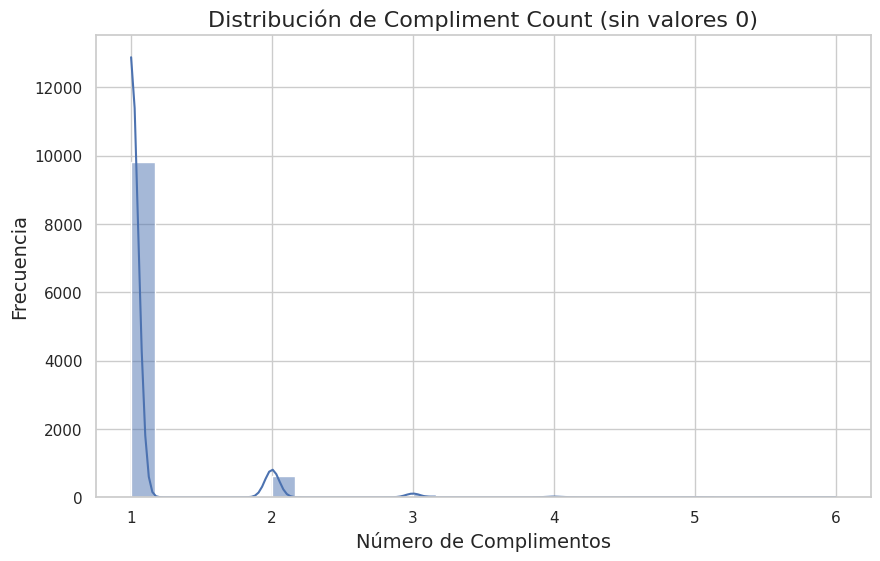

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los registros donde compliment_count es mayor que 0
df_filtered = df_tip[df_tip['compliment_count'] > 0]

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(10,6))

# Graficar la distribución de compliment_count sin los valores 0
sns.histplot(df_filtered['compliment_count'], bins=30, kde=True)

# Agregar títulos y etiquetas
plt.title('Distribución de Compliment Count (sin valores 0)', fontsize=16)
plt.xlabel('Número de Complimentos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar la gráfica
plt.show()


In [ ]:
max_reacciones = df_tip['compliment_count'].max()
print(f"El máximo número de cumplidos en un tip es: {max_reacciones}")


El máximo número de cumplidos en un tip es: 6


In [ ]:
# Filtrar los valores entre 0 y 6
df_filtrado = df_tip[df_tip['compliment_count'].isin([0, 1, 2, 3, 4, 5, 6])]

# Calcular el total de tips en el rango
total_tips = df_filtrado.shape[0]

# Contar cuántos tips hay para cada valor de compliment_count y calcular el porcentaje
porcentajes = df_filtrado['compliment_count'].value_counts(normalize=True) * 100

# Mostrar los porcentajes solo de los valores 0 a 6
for count in range(7):
    print(f"{porcentajes.get(count, 0):.2f}% de tips tienen {count} cumplidos.")


98.84% de tips tienen 0 cumplidos.
1.08% de tips tienen 1 cumplidos.
0.07% de tips tienen 2 cumplidos.
0.01% de tips tienen 3 cumplidos.
0.00% de tips tienen 4 cumplidos.
0.00% de tips tienen 5 cumplidos.
0.00% de tips tienen 6 cumplidos.


### De acuerdo con estos resultados el 98.84% de datos tienen 0 cumplidos.Por lo tanto esta columna no tiene un valor agregado para el analisis. Procedemos con su eliminacion

In [ ]:
# Columna a eliminar
columns_to_drop = [ 'compliment_count']

# Elimina las columnas del DataFrame
df_tip_cleaned = df_tip_cleaned.drop(columns=columns_to_drop)

In [ ]:
print(df_tip_cleaned.shape)  # Verifica el tamaño del DataFrame
print(df_tip_cleaned.head())  # Muestra las primeras filas del DataFrame limpio

(106193, 5)
                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text       fecha      hora  
0                     Avengers time with the ladies.  2012-05-18  02:17:21  
1  They have lots of good deserts and tasty cuban...  2013-02-05  18:35:10  
2             It's open even when you think it isn't  2013-08-18  00:56:08  
3                          Very decent fried chicken  2017-06-27  23:05:38  
4             Appetizers.. platter special for lunch  2012-10-06  19:43:09  


In [ ]:
# Exportar el archivo comprimido para ahorrar espacio
df_tip_cleaned.to_csv("/content/drive/My Drive/tip_cleaned.csv.gz", compression='gzip', index=False)